<a href="https://colab.research.google.com/github/nancymattamonroy/Data_Analysis/blob/main/Iris_EDA_MentorTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS EXPLORATORIO DE DATOS CON PYTHON



# Configuración del entorno de trabajo

En este módulo veremos el análisis **exploratorio de los datos (EDA: en inglés Exploratory Data Analysis)**. Este proceso es el que utilizaremos para evaluar los datos que tenemos disponibles y generar un conocimiento general del comportamiento de las variables del problema.

Para hacer esto necesitamos hacer uso de la estadística para obtener medidas de tendencia central de los datos, aplicar transformaciones y verificar normalidad. Utilizaremos herramientas de visualización para ver el comportamiento global de los datos y complementar el análisis estadístico.

Por lo tanto, necesitamos instalar librerías de análisis de datos como **pandas** y **numpy**, y librerías de visualización como **matplotlib** y **seaborn**. En este notebook utilizaremos el dataset [iris](https://www.kaggle.com/datasets/arshid/iris-flower-dataset) de kaggle, muy usado como en el ámbito educativo.

In [ ]:
# Importar las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Introducción
Es fundamental cargar, explorar y entender los datos, su calidad y su comportamiento **antes** de empezar a trabajar con ellos. Este proceso es necesario para tener una aproximación a los datos y debemos hacerlo antes de realizar cualquier análisis. Además, debemos conocer el comportamiento de los datos porque **muchas de las técnicas estadísticas de análisis de datos presuponen el cumplimiento de unas condiciones previas**, como **normalidad**, **no colinearidad** y **escalas comparables** para poder garantizar el funcionamiento correcto de las técnicas.

La definición formal de este análisis exploratorio de los datos es: el conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos.

#Porque usar EDA?

Identificar posibles errores (datos mal diligenciados o introducidos, detectar la ausencia de valores o una mala codificación de las variables revelar la presencia de valores atípicos (outliers) comprobar la relación entre variables (correlaciones) y su posible redundancia análisis descriptivo de los datos mediante representaciones gráficas y resúmenes de los aspectos más significativos.

El objetivo del EDA se puede dividir en 6 principios

* **Maximizar el número de insights que obtenemos del dataset**
* **Descubrir la estructura y las relaciones entre los datos**
* **Extraer variables relevantes**
* **Detectar anomalías, valores duplicados y valores perdidos (missing values)**
* **Validar suposiciones o presuposiciones que podamos tener sobre los datos**
* **Determinar la relevancia de los datos y optimizar el input de nuestros modelos**

Un concepto importante aquí es que el EDA no es un proceso que sea exclusivo para el modelado para ciencia de datos. Las empresas, estudiantes e investigadores pueden sacar mucho provecho de entender sus datos y se tener un conocimiento práctico sobre como se comportan, antes de empezar a intentar extraer conclusiones o incluso modelar su comportamiento. El EDA es una pieza **fundamental en los procesos de ciencia de datos**. Siempre se espera que podamos realizar un análisis exploratorio antes de empezar a trabajar en un modelado. Muchas veces se habla de la regla del **80-20%** en el que el 80% del trabajo de un Data Scientist debería estar dedicado a obtener y entender los datos, y un 20% a tareas de modelado y la configuración de modelos.

## Pasos del análisis exploratorio

Existen cientos de tutoriales y maneras de enfrentarnos a un análisis exploratorio. Auí veremos una forma de abordar el análisis exploratorio, esté se puede dividir en **3 grandes pasos**, pero estos pasos se subdividen en muchas tareas que debemos realizar para empezar a interpretar los resultados. Una **nota importante** sobre el EDA es que veremos primero limpieza de datos y luego visualización, pero es muy importante destacar que en la práctica veremos ambas a la vez, ya que muchas veces debemos visualizar los datos para identificar nulos o errores.

- **Carga de los datos:** Este paso parece trivial pero no lo es en la práctica. Acceder a los datos en la práctica generalmente supone conectarnos a una base de datos, a un datalake o plataforma cloud, o incluso compaginar datos de distintas fuentes. Es importante **no subestimar** este paso, ya que no siempre tendremos los datos a disposición. Hay algo muy importante, sobre todo cuando leemos un fichero de texto, y es lo que se conoce como **encoding**. Alguna vez has leído un fichero de Excel y obtuviste caracteres raros? Esto se debe a que el encoding que está utilizando Excel para leer el fichero no es el correcto. Esto, cuando tratamos con texto leido de ficheros de texto suele ser un problema. El encoding para datos en español latino sera utf-8.

- **Limpieza de datos:** La limpieza de datos se basa en obtener un dataset con el que podamos visualizar y finalmente modelar el problema. En este paso intentaremos eliminar duplicados (si corresponde), tratar valores nulos (si corresponde) y asegurarnos que los formatos y tipos de los datos sean los correctos.

    - **Formatos y tipos:** Una de las primeras tareas que debemos verificar cuando nos enfrentamos a un dataset nuevo son los tipos de datos que tenemos. Podemos hacer esto con el método .info() o incluso con el método .dtypes sobre el DataFrame. Lo que queremos es familiarizarnos con los tipos de datos que tenemos, y también asegurarnos que el formato sea el correcto. En datasets geográficos por ejemplo, debemos verificar que las columnas de coordenadas estén en el formato correcto. o que tengan la columna que hace referencia a al geometría.
    - **Valores nulos:** Uno de los trabajos más importantes en el análisis exploratorio esta en hallar y tratar los datos nulos. Los valores nulos pueden suceder a causa de una mala recolección de datos, a causa de archivos que se han corrompido o pueden ser intencionales. Veremos que hay muchas maneras diferentes de solucionar el problema de los valores nulos, pero siempre debemos tener en cuenta que muchas veces estaremos fabricando información si elegimos imputarle un valor a estos valores, por lo que debemos ser cautos. El método .isnull() o .isna() aplicado a las columnas de los DataFrames nos será muy útil en estos casos. Podemos hacer df[columna].isna().sum() para saber rápidamente cuantos elementos nulos tenemos por columna.
    - **Registros duplicados:** Los valores duplicados no siempre se tratan, pero pueden ser molestos de vez en cuando, aunque debemos estar seguros de su procedencia antes de determinar si quitarlos o no.
    
    
- **Visualización:** Esta es la etapa a la que la gente normalmente hace referencia con el EDA. A partir de este momento tenemos un dataset limpio y funcional. Ahora solo queda explorarlo, visualizar la distribución de las variables numéricas, explorar los recuentos de las variables categóricas, aplicar análisis estadísticos y transformaciones. Al final de este proceso deberíamos tener los datos listos para comenzar a modelar. Este proceso es el que tiene menos estructura, ya que a medida que comencemos a explorar los datos descubriremos nuevas alternativas para explorar y es difícil anticiparse a eso sin ver el dataset. Hay 4 tareas que prácticamente siempre se realizarán:

    - **Analisis univariante:** Debemos explorar todas las variables por sí mismas. Cómo se distribuyen? Cuales son relevantes? Hay alguna peculiaridad que se nos haya escapado durante los dos procesos anteriores? Si las variables son categóricas.. Cómo son los recuentos por categoría? Hay alguna categoría más frecuente que las demás? Alguna menos frecuente?
    - **Análisis bivariante:** Este paso agrega una dimensión más al problema. Ahora intentaremos Estudiar las relaciones de dependencia entre las variables de dos en dos. Algo importante a tener en cuenta es que siempre debemos intentar visualizar qué relación tienen nuestras variables con la variable que queremos predecir. También debemos buscar relaciones entre las demás variables para asegurarnos que no existan dependencias lineales entre ellas que puedan reducir el desempeño del modelo.
    - **Análisis multivariante:** En algunos casos, podemos intentar visualizar relaciones entre varias variables a la vez. Estos ya se vuelven más complejos de interpretar, pero en algunos casos pueden darnos información muy útil para resolver nuestro problema. Recordemos que nuestro objetivo en este paso es identificar aquel conjunto de variables que nos generará el mejor resultado de predictivo.
    - **Análisis de correlación:** En el análisis de correlación estudiaremos las relaciones de correlación entre las variables continuas. Si la variable que queremos predecir es continua, entonces nos interesa incluirla en el análisis y nos interesan particularmente las variables que correlan bien con nuestra variable objetivo. Si no, igualmente nos interesa la correlación para eliminar variables que tengan dependencia lineal entre ellas.
    


#Iniciemos con la exploración de datos

# 1. Importando los datos
 Comenzaremos importando los datos del directorio donde están almacenados. En este caso no hay variables de tipo texto, así que no debemos verificar el encoding. Sí es importante volver a señalar que el acceso a los datos en estos problemas es sencillo, pero en la práctica suele ser bastante complejo

In [ ]:
#Para cargar el data set descarga el conjunto de https://github.com/nancymattamonroy/DATA/blob/main/IRIS.csv y cargalo al workspace
data_original = pd.read_csv('/content/IRIS.csv')
data_original.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Como buena practica, antes de contunuar haremos una Como buena práctica, antes de continuar haremos una copia de la base de datos inicial, el método .copy() nos hará una copia limpia del dataframe.

In [ ]:
data = data_original.copy()

# 2. Limpieza de Datos

Una vez que hemos cargado los datos y hemos verificado su integridad, pasamos a la limpieza. Ahora revisaremos el formato de los datos, los tipos de datos que tenemos, los valores nulos y haremos un comentario sobre los valores duplicados.

Ahora nos interesa familiarizarnos con los tipos de datos de nuestro dataset. Esto sucede por dos motivos, el primero es que nos interesa saber si estamos tratando con texto, valores numéricos, categóricos, números enteros, decimales, y sus medidas estadísticas centrales y de dispersión. Básicamente queremos un resumen matemático de alto nivel sobre los principales datos estadísticos del dataset.

Si utilizamos el método **.dtypes** sobre el DataFrame veremos que todos los valores de las columnas son numéricos, menos el de la clase que queremos predecir (llamado **species**) que es del tipo string. Pandas llama al tipo string como object, por eso veremos el valor object en la última línea.

In [ ]:
# Tipos de datos
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

También suele ser útil verificar el tamaño del Dataset. El dataset es una tabla, por lo que tiene una cantidad de registros igual a la cantidad de filas y una cantidad de variables igual a la cantidad de columnas. El atributo .shape del DataFrame nos permite saber el tamaño del DataFrame. Lo devuelve como una tupla de la forma: ("número de filas", "número de columnas")

In [ ]:
#dimensiones del conjunto de datos
data.shape

(150, 5)

El metódo .columns nos permnitira tener el nombre exacto de cada columna, ten en cuenta que podras encontar columnas con nombre con espacio, por ejemplo "Tipo Flor". El metódo .describe() nos dara la información de las estadísticas básicas para ir entendiendo los datos

In [ ]:
# Damos un vistazo las columnas
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# ahora veremos el resumen estadístico
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Del conjunto de datos análizar encontramos que la variable target (y) es species, con el método .unique() obtendremos el dominio y

In [ ]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#Valores nulos
Ahora queremos ver si el dataset tiene valores nulos y qué hacer con ellos en caso de que los tenga. Vemos que este dataset no tiene valores nulos. Pero se podrian identificar inicialmente así

In [ ]:
# revisión inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
# Contar los nulos
for column in data.columns:
    num_nulls = data[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "sepal_length" has 0 nulls
Column "sepal_width" has 0 nulls
Column "petal_length" has 0 nulls
Column "petal_width" has 0 nulls
Column "species" has 0 nulls


#Valores duplicados
Primero buscaremos los valores repetidos en el dataframe. Esto podemos hacerlo con el método **.duplicated()**. Este método devuelve una serie de True/False que tiene True en la posición donde hay un duplicado y False en la posición donde no la hay. Si le pasamos eso al DataFrame original, es como si estuvieramos filtrando por los valores que están duplicados.

Una observación es que el método duplicated por defecto borra el primer elemento repetido, pero como nos interesa ver todos los elementos, le pasamos el argumento "keep" como False, lo que significa que queremos ver todos los valores repetidos.

In [ ]:
data.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


El DataFrame resultante tiene 147 filas en lugar de 150 (hemos eliminado 3 registros duplicados). Otra observación importante es que en realidad no hemos tocado el DataFrame. La operación de .drop_duplicates no es una operación inplace. Lo que quiere decir que si no sobreescribimos el dataframe data con data.drop_duplicates o lo guardamos en otro dataframe, no cambiará nada. Si no queremos tener que redefinir otro dataframe o sobreescribirlo, la función también tiene un argumento inplace que si cambiamos a True modificará el DataFrame data (en este caso no nos devolverá nada en pantalla).

In [ ]:
# Método 1: Sobreescribir el valor de data
data = data.drop_duplicates()

# Método 2: Guardar el valor en otra variable
data_depurado = data.drop_duplicates()

# Método 3: Sobreescribir inplace
data.drop_duplicates(inplace=True)

<ipython-input-52-40165244a91b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 3. Visualización

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariado y multivariado.

##Análisis Univariado
La variable 'species' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que vamos a estudiarla con mayor detenimiento.

El análisis univariado se centra en una única variable a la vez. No nos interesa ver el comportamiento de la variable en relación a las demás, sino en relación a si misma. Cómo es su distribución? Es una categoría o una variable continua? Hay alguna variable que nos llame la atención? Todo esto es lo que queremos responder en este análisis.



#### sepal length

La primer variable es sepal length. está será una de las variables para intentar adivinar el tipo de flor, ya que no sabemos nada sobre este tipo de planta.

In [ ]:
# Estadísticas para la variable 1: sepal length
data['sepal_length'].describe()


count    147.000000
mean       5.856463
std        0.829100
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<Axes: xlabel='sepal_length', ylabel='Count'>

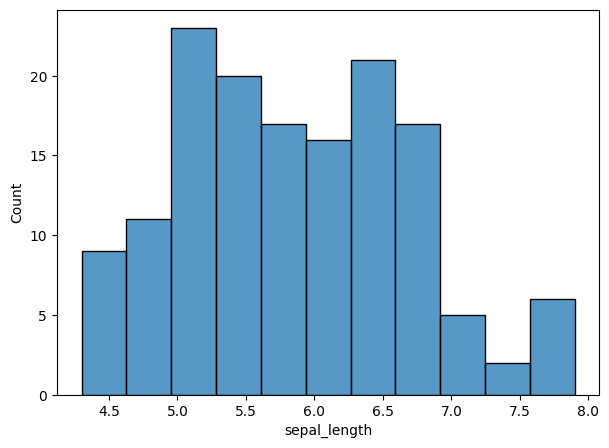

In [ ]:
#Análisis variable 1: sepal length
plt.figure(figsize=(7, 5))
sns.histplot(data, x='sepal_length', bins=11)

Vemos que la distribución de esta variable no es exactamente normal, pero tiene una forma de campana con una cola pesada. Vemos que la mayoría de los valores se encuentran entre 5 y 6.5

#### sepal width

Veamos ahora como se comporta la variable sepal_width. Veremos en el gráfico debajo que esta variable tiene un comportamiento mucho más similar a una distribución normal.

In [ ]:
# Estadísticas para la variable 2: sepal width
data['sepal_width'].describe()

count    147.000000
mean       3.055782
std        0.437009
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

<Axes: xlabel='sepal_width', ylabel='Count'>

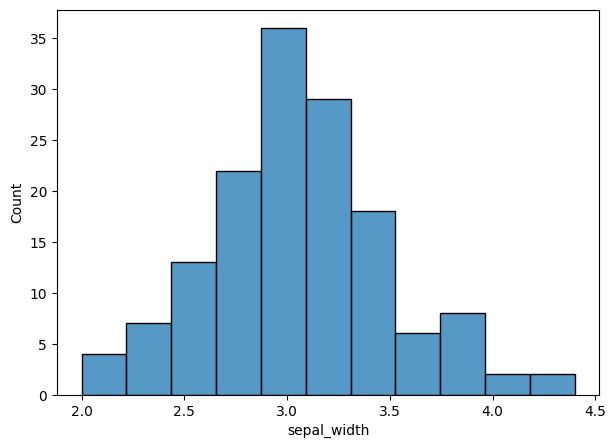

In [ ]:
#Análisis variable 2: sepal width
plt.figure(figsize=(7, 5))
sns.histplot(data, x='sepal_width', bins=11)

#### petal length

Veamos ahora cómo se comporta la variable petal length. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y es que tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. Veremos al final cómo podemos solucionarlo aplicando una transformación logarítmica.

In [ ]:
# Estadísticas para la variable 3: petal length
data['petal_length'].describe()

count    147.000000
mean       3.780272
std        1.759111
min        1.000000
25%        1.600000
50%        4.400000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

<Axes: xlabel='petal_length', ylabel='Count'>

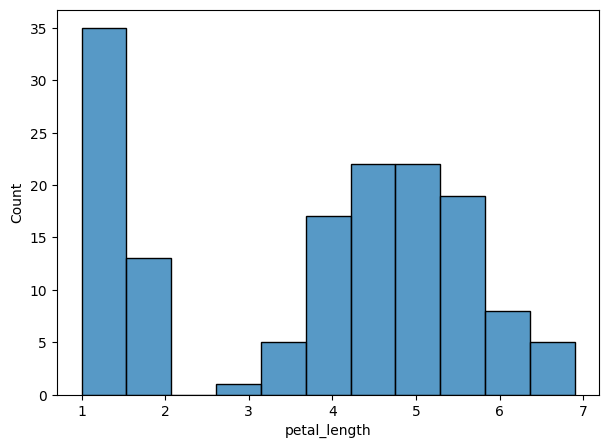

In [ ]:
# Análisis variable 3: petal length
plt.figure(figsize=(7, 5))
sns.histplot(data, x='petal_length', bins=11)

#### petal width

Veamos ahora cómo se comporta la variable petal width. Esta variable también tiene un componente bastante frecuente en algunas distribuciones, y es que tiene una alta concentración de valores al principio, pero luego se comporta como una distribución normal. Veremos al final cómo podemos solucionarlo aplicando una transformación logarítmica, aunque probablemente no funcione tan bien como en petal length

In [ ]:
# Estadísticas para la variable 4: petal width
data['petal_width'].describe()

count    147.000000
mean       1.208844
std        0.757874
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

<Axes: xlabel='petal_width', ylabel='Count'>

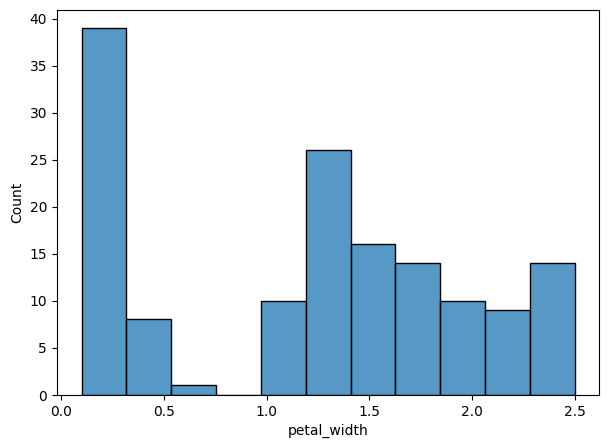

In [ ]:
# Análisis variable 4: petal width
plt.figure(figsize=(7, 5))
sns.histplot(data, x='petal_width', bins=11)

#### species

Llegamos al análisis más importante de este proceso, el análisis de la clase que queremos intentar predecir (y). El objetivo de este problema es predecir el tipo de flor en función de las 4 variables que acabamos de estudiar, así que un buen punto de partida será ver cómo se distribuye la variable.

Lo primero que debemos pensar es qué tipo de variable es esta? Es una variable **categórica**, por lo que no podemos hacer un histograma como en los casos anteriores. La forma más sencilla de mostrar la distribución de una variable categórica es por **conteo**, por lo que utilizaremos un countplot de Seaborn.

<Axes: xlabel='species', ylabel='count'>

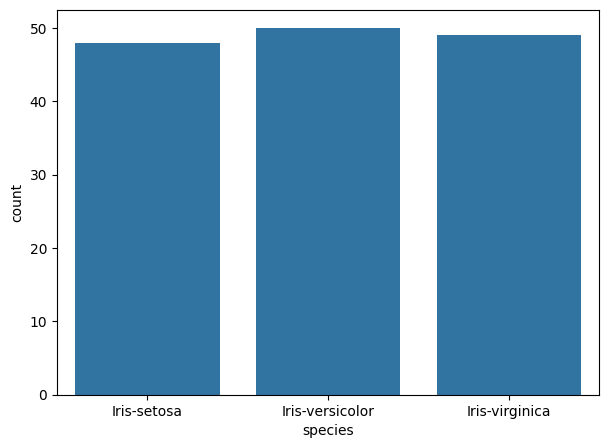

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data, x='species')

Pareciera que todas las clases tienen la misma representación, que es el caso ideal, estan balanceadas. En el caso de clases desbalanceadas, tenemos que ver cómo podemos rebalancear las clases para que nuestro modelo pueda aprender suficiente de cada clase y no priorizar una sobre otra, o incluso predecir siempre una si el desbalance es muy grande. Algúnos métodos estadísticos son oversampling y undersampling. Aunque también han surgido métodos más avanzados que introducen pequeñas perturbaciones a los datos para generar nuevos registros que no estén en los datos per se.

Igualmente, como el gráfico puede ser engañoso,haremos una pequeña verificación solo para asegurarnos de la distribución.

In [ ]:
data['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

## Análisis bivariado

Luego de ver como se comportan los datos por sí mismos, nos interesa ver cómo se comportan los datos en relación a los demás. Como las 4 variables independientes son numéricas, podemos utilizar un truco para graficar rápidamente las relaciones entre todas ellas utilizando un **pairplot** de Seaborn. En la práctica si hay muchas variables es posible que antes tengamos que hacer un estudio de correlación o algo que nos permita quitarnos algunas variables del medio (reducción de dimensionalidad), y solo analizar las variables relevantes y/o correladas.

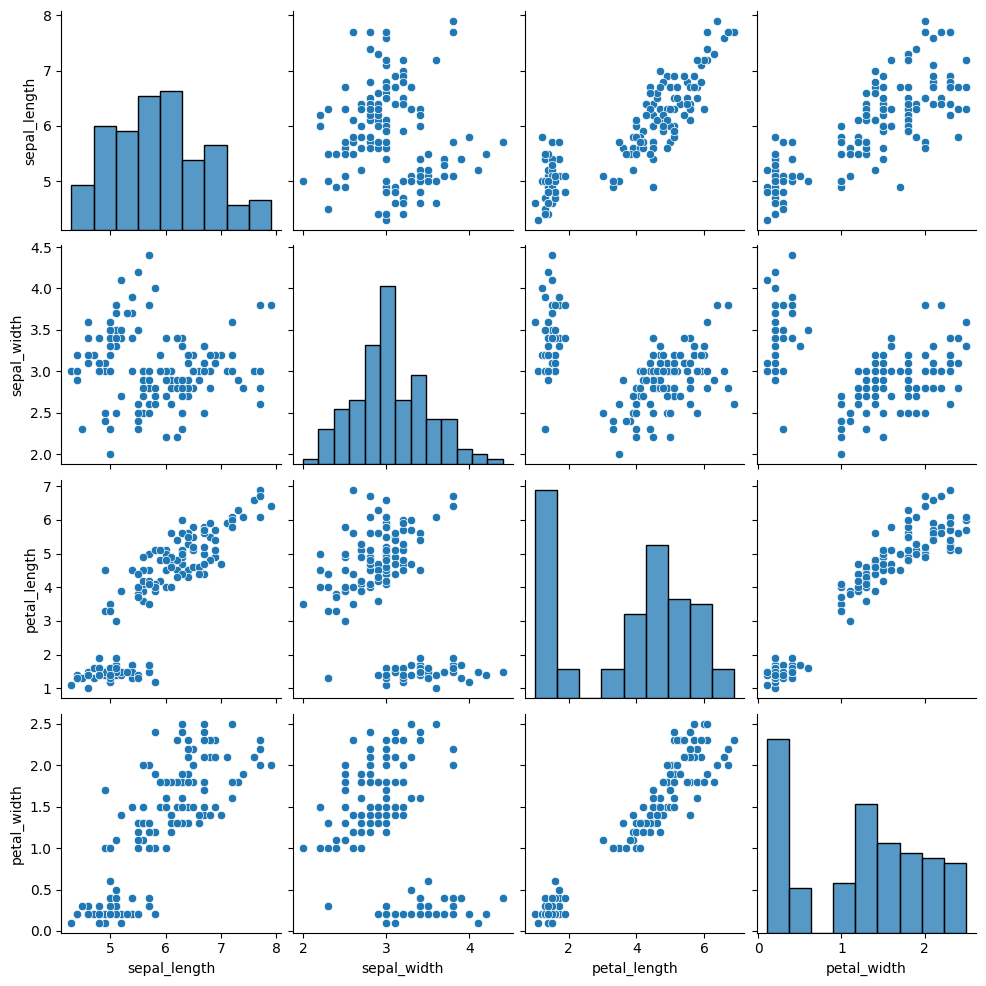

In [ ]:
sns.pairplot(data)


Vemos que las variables petal length y petal width están bastante correladas, y lo mismo se ve para petal length y sepal length.

## Análisis multivariado

Finalmente, podemos introducir una variable más a este proceso, que será la variable a predecir "species". Podemos hacerlo introduciendo un hue en el pairplot para ver si podemos visualizar rápidamente alguna frontera de separación entre las 3 especies de flores.

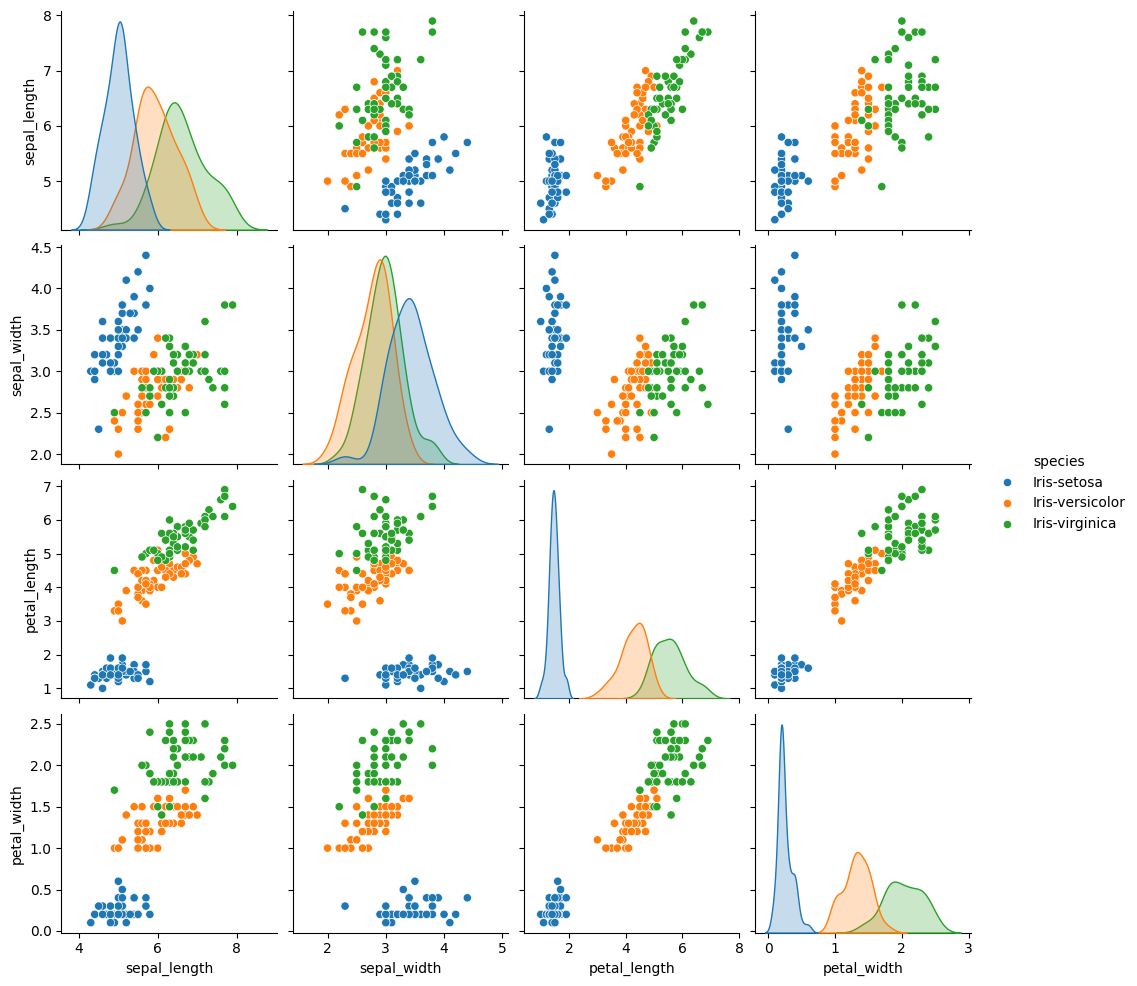

In [ ]:
sns.pairplot(data, hue='species')

Vemos que claramente existe una frontera de separación entre los datos, por lo que es probable que nuestro problema sea capaz de resolverlo de forma analítica y llegando a un buen resultado.

## Análisis de correlación

Este análisis siempre es muy importante en las variables numéricas, y sobre todo en los modelos lineales (aunque debemos revisarlo siempre). La multicolinearidad es un gran problema en el cálculo matricial, por lo que debemos evitar a toda costa variables con correlación alta, porque significa que están introduciendo problemas al modelo que luego entrenaremos para resolver el problema.

Algunos errores comunes que se cometen en el análisis de correlación:

- Incluir variables categóricas: la correlación (de Pearson) se calcula como el ratio entre la covarianza entre dos variables y la raíz del producto de sus varianzas. Esto significa que las variables que utilicemos en el análisis de correlación deberán ser continuas.
- No definir la escala correcta: La correlación está entre 0 y 1, pero muchas veces cuando graficamos veremos que la escala de colores se ajusta al valor mínimo y máximo de nuestra escala. Es muy poco probable tener dos variables que tengan correlación 0 y 1, y por lo tanto la escala variará entre estos dos valores y no entre 0 y 1, esto nos puede sesgar a pensar que una diferencia entre dos valores es mayor de lo que es en realidad. Para solucionar esto se suelen imponer los valores máximos y mínimos del mapa de calor.
- Tomar correlación "buena" o "mala" basado en un número arbitrario: muchas veces veremos declaraciones como "correlación por encima de 0.7 es muy alta" o lo contrario. En la realidad debemos apoyarnos en el gráfico y el valor de la correlación a la vez para poder tomar una decisión más acertada.
- No graficar los valores de la correlación sobre los gráficos en el heatmap: Los valores ayudar a resolver esas diferencias en las que no estamos seguros de si lo que vemos es una correlación muy alta o regular. Para esto le pasaremos al heatmap el parámetro annot=True

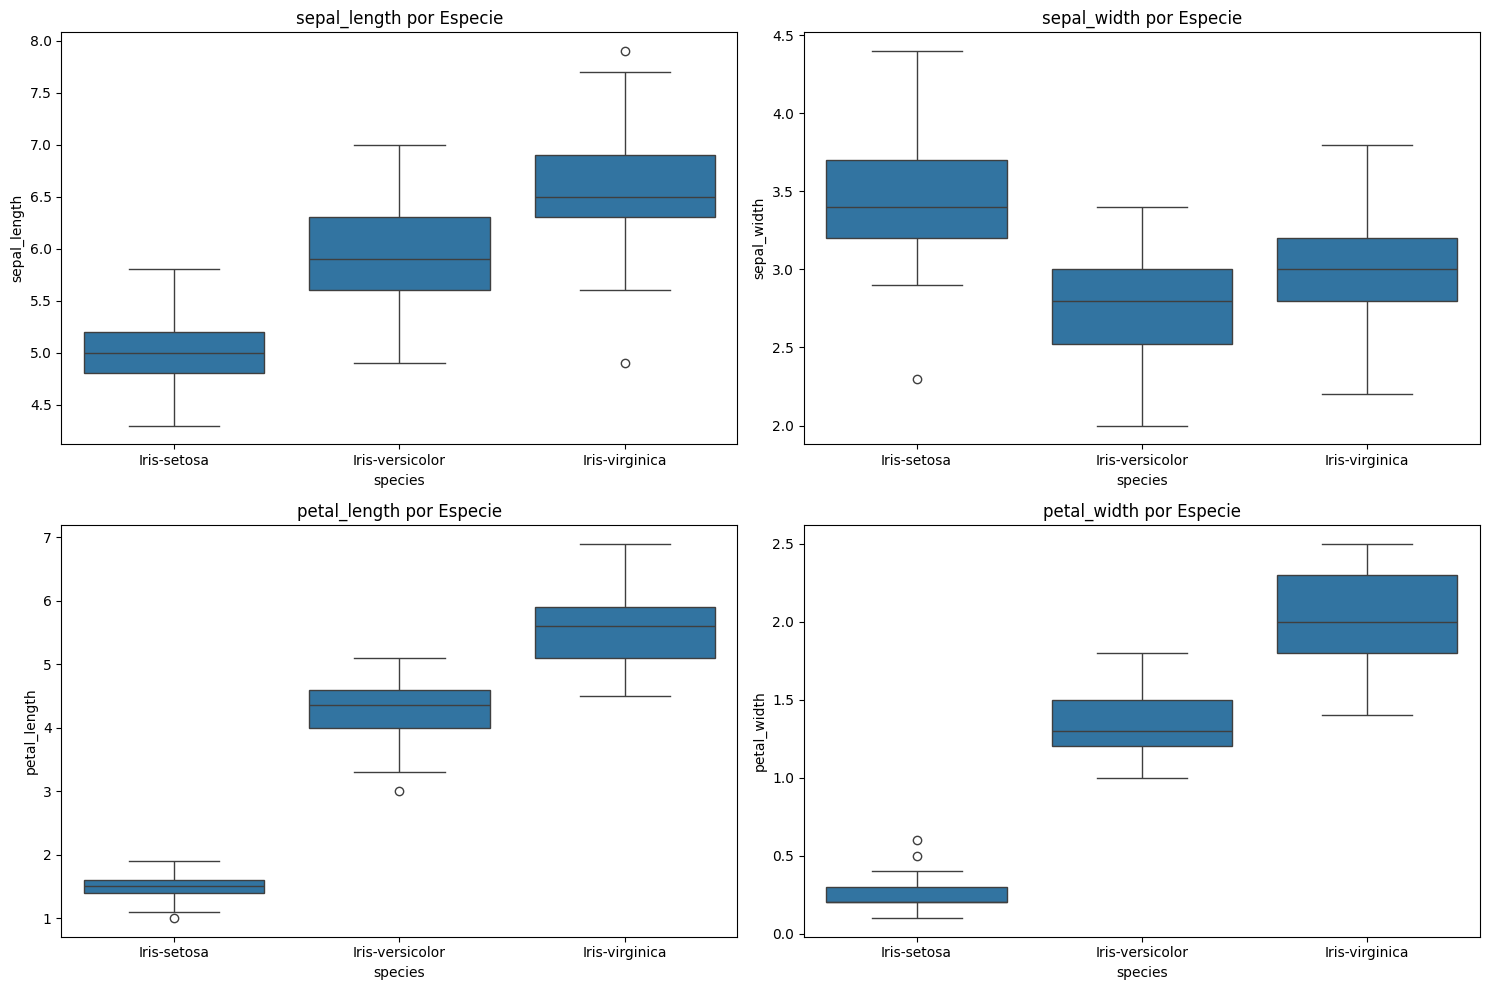

In [ ]:
# Crear gráficos de caja para variables numéricas por especie
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=data)
    plt.title(f'{column} por Especie')
plt.tight_layout()
plt.show()

In [ ]:
data.drop(columns=['species'], inplace=True)

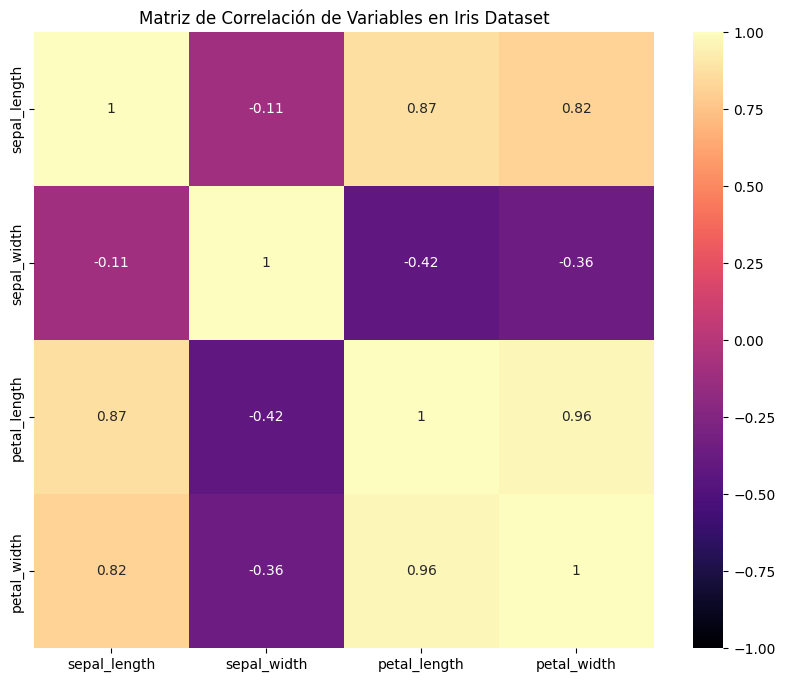

In [ ]:
# Visualizar la matriz de correlación utilizando un mapa de calor de seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='magma', annot=True)
plt.title('Matriz de Correlación de Variables en Iris Dataset')
plt.show()

Se ve claramente que la correlación entre petal_length y sepal_length y la de petal_length y petal_width es alta, como habíamos visto en los demás análisis. Esto confirma nuestra teoría. Veamos que pasa con la escala si no aclaramos los valores de vmax y vmin

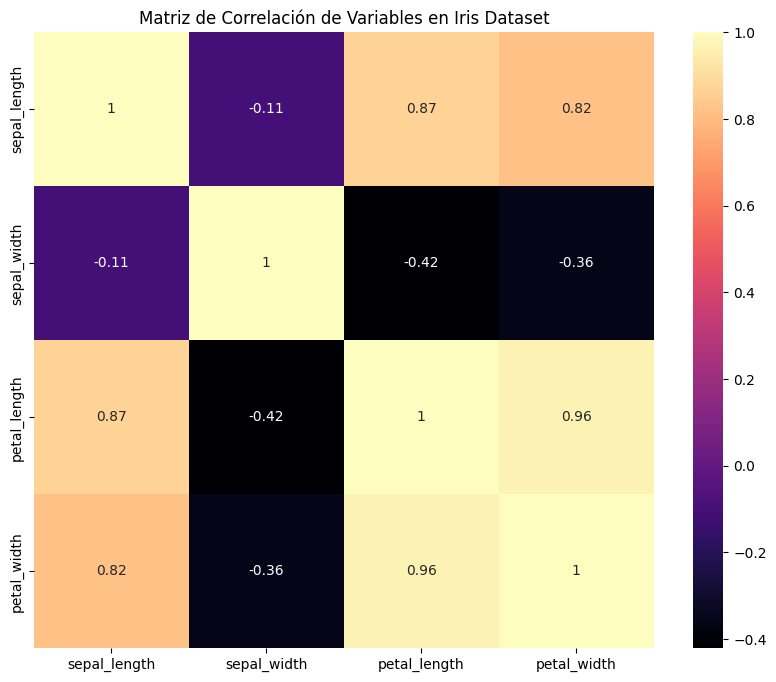

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='magma', annot=True)
plt.title('Matriz de Correlación de Variables en Iris Dataset')
plt.show()

Vemos que los colores son más intensos porque la escala es más acotada, por lo que el cambio pequeño afecta bastante a la percepción de la diferencia entre los valores de correlación.

Con este ejemplo tendríamos un análisis completo de los datos a llevar a un modelos implementado EDA